In [1]:
# Pandas is used for data manipulation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

2023-08-22 11:09:10.756769: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


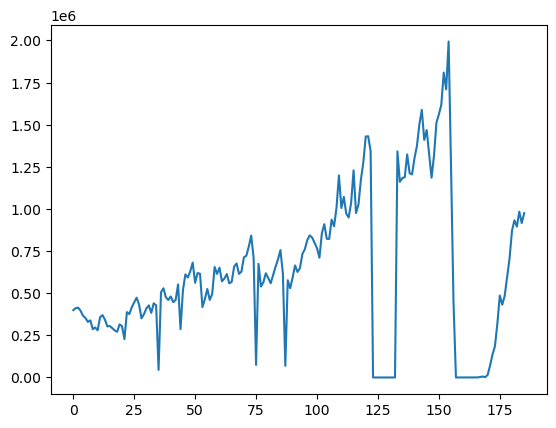

In [2]:
# Read in data and display fist 5 rows
df = pd.read_csv('TIME SERIES + VISITOR ATTENTION INDEX +TOPIC AND SENTIMENT INTENSITY- DATA COMPOSITION 4 (Fixed Set Test).csv')
df1 = df.drop(['Class'], axis=1)
df1 = df1['Tourist Arrival']
df1 = np.array(df1).reshape(-1,1)
df1
plt.plot(df1)

In [3]:
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(df1)
df1.min()

0.0

In [4]:
train_size = 133
validation_size = 13
test_size = 40

In [5]:
train = df1[0:133, :]
train.shape

(133, 1)

In [6]:
validation = df1[133:146, :]
validation.shape

(13, 1)

In [7]:
test = df1[146:186, :]
test.shape

(40, 1)

In [8]:
def get_data(df1, look_back):
    dataX, dataY = [], []
    for i in range (len(df1)-look_back-1):
        a = df1[i:(i+look_back),0]
        dataX.append(a)
        dataY.append(df1[i+look_back, 0])
    return np.array(dataX), np.array(dataY)

In [9]:
look_back = 1
x_train, y_train = get_data(train, look_back)

In [10]:
x_test, y_test = get_data(test, look_back)

In [11]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

In [12]:
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(LSTM(192, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer =Adam(learning_rate=0.0005))
history = model.fit(x_train, y_train, epochs=50, batch_size=1)
model.summary()

2023-08-22 11:09:17.002333: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/50
131/131 [==============================] - 3s 6ms/step - loss: 0.0367
Epoch 2/50
131/131 [==============================] - 1s 5ms/step - loss: 0.0147
Epoch 3/50
131/131 [==============================] - 0s 4ms/step - loss: 0.0131
Epoch 4/50
131/131 [==============================] - 0s 4ms/step - loss: 0.0113
Epoch 5/50
131/131 [==============================] - 0s 4ms/step - loss: 0.0103
Epoch 6/50
131/131 [==============================] - 1s 4ms/step - loss: 0.0092
Epoch 7/50
131/131 [==============================] - 1s 5ms/step - loss: 0.0085
Epoch 8/50
131/131 [==============================] - 1s 4ms/step - loss: 0.0086
Epoch 9/50
131/131 [==============================] - 0s 4ms/step - loss: 0.0084
Epoch 10/50
131/131 [==============================] - 0s 4ms/step - loss: 0.0081
Epoch 11/50
131/131 [==============================] - 0s 3ms/step - loss: 0.0083
Epoch 12/50
131/131 [==============================] - 0s 3ms/step - loss: 0.0080
Epoch 13/50
131/131 [====

In [13]:
y_pred = model.predict(x_test)

2/2 [==============================] - 1s 4ms/step


In [14]:
scaler.scale_

array([5.01473077e-07])

In [15]:
y_pred = scaler.inverse_transform(y_pred)

In [16]:
y_test = np.array(y_test)
y_test = y_test.reshape(-1,1)
y_test = scaler.inverse_transform(y_test)

In [17]:
from math import sqrt
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_absolute_percentage_error

In [18]:
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", RMSE)

Root Mean Squared Error: 220436.23400509762


In [19]:
MAE = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", MAE)

Mean Absolute Error: 159699.00986842104


In [20]:
MAPE = mean_absolute_percentage_error(y_test, y_pred)
print("Mean Absolute Percentage Error:", MAPE)

Mean Absolute Percentage Error: 1.7148646294437013e+20


In [21]:
def SMAPE(y_test,y_pred):
    return 100/len(y_test) * np.sum(2 * np.abs(y_pred - y_test) / (np.abs(y_test) + np.abs(y_pred)))
result = SMAPE(y_test,y_pred)
print("SMAPE :", result)

SMAPE : 84.6433456533771


In [22]:
def RMSPE(y_test, y_pred):
    return np.sqrt(np.nanmean(np.square(((y_test - y_pred) / y_test))))*100
result1 = RMSPE(y_test,y_pred)
print("RMSPE :", result1)

RMSPE : inf


/var/folders/w4/3f8pkphx2j78qktgvt5lpdvw0000gn/T/ipykernel_11639/2542154612.py:2: RuntimeWarning: divide by zero encountered in divide
  return np.sqrt(np.nanmean(np.square(((y_test - y_pred) / y_test))))*100


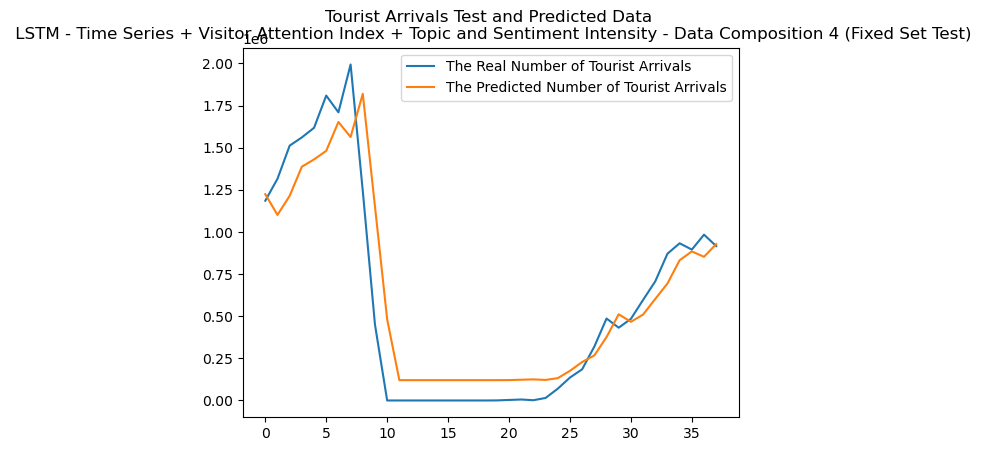

In [23]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="The Real Number of Tourist Arrivals")
plt.plot(x_ax, y_pred, label="The Predicted Number of Tourist Arrivals")
plt.title("Tourist Arrivals Test and Predicted Data \n LSTM - Time Series + Visitor Attention Index + Topic and Sentiment Intensity - Data Composition 4 (Fixed Set Test)")
plt.legend()
plt.show()